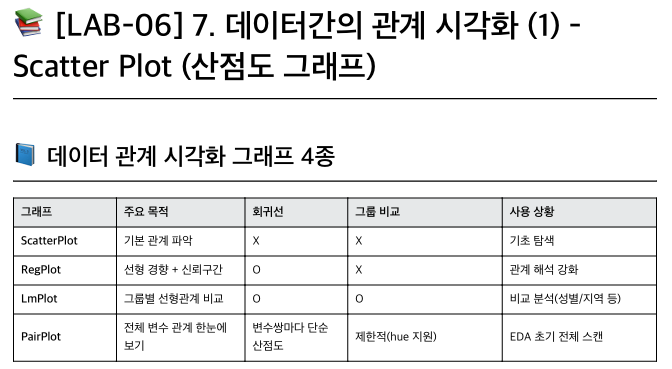

Scatter Plot의 이해
- 두 연속형 변수의 관계를 시각화 하는 가장 기본적인 그래프
- 두 연속형 변수간의 영향력(분포와 상관 경향)을 점(point)으로 표시
- 패턴(직선적,곡선적), 군집 형태, 이상치를 쉽게 파악
- 통계적 모델은 포함하지 않으며 관계의 형태를 "그려만 준다"
- 그럼 언제씀 ? -> 변수 간 기본적인 관계가 있는지 빠르게 확인할 때

Scatter Plot의 해석
- 마커들이 오밀조밀 뭉쳐 있으면 두 변수는 서로 관련성 정도가 높고 흩어져 있으면 관련성이 낮음
- 이를 상관관계라고 함
- 예시로는 아래의 그래프에서 응시한 학생 비율이 높을 수록 수학 평균 점수가 낮아지는 경향이 나타남

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [2]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = load_data("icecream")
origin

[data] https://data.hossam.kr/data/lab06/icecream.xlsx
[desc] 기온과 아이스크림 판매량을 기록한 가상의 데이터 (메타데이터,인덱스 없음)
[!] Cannot read metadata


,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476
5,31,523
6,29,491
7,32,526
8,33,550
9,24,456


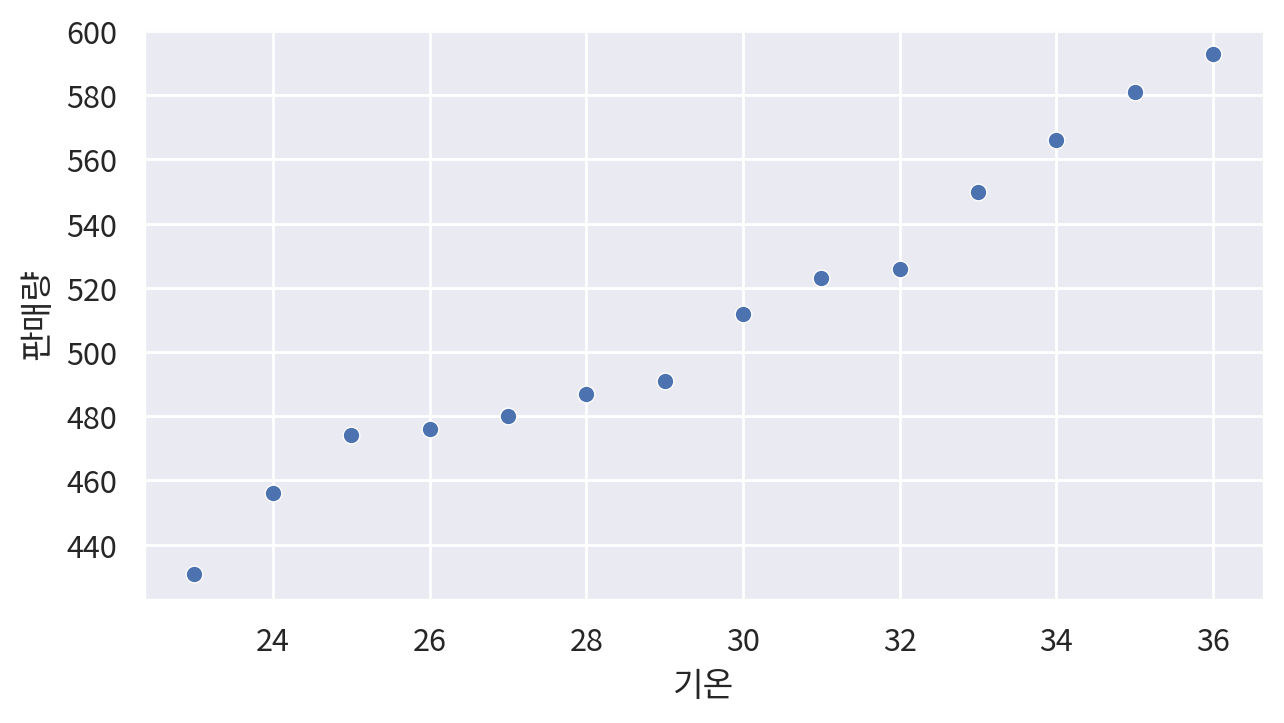

In [4]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.scatterplot(data=origin, x='기온', y='판매량')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

기온에 따른 아이스크림 판매량을 확인한 결과 기온이 상승할 수록 판매량도 증가하는 추세

- 추세선(회귀선) 그리기
    - 주어진 데이터의 일반적인 경향이나 패턴을 나타내는 선
    - 주로 선형 회귀 분석을 통해 계산되며 이를 통해 데이터 간의 관계를 파악하고 예측 모델을 개발하는 데 도움이 됨
    - scipy나 sklearn 패키지를 통해 선형회귀 모델을 구현하여 회귀식을 도출해야하지만, numpy를 통해 간단한 분석 모델을 도출할 수 있음
    - 계수, 상수항 = np.polyfit(x,y,차수)
    - 통계학에서는 계수(기울기)를 가중치, 상수항(절편)를 편향이라 하지만 numpy에서는 상수항과 계수라고 함

In [5]:
z = np.polyfit(origin['기온'], origin['판매량'], 1)
print('상수항', z[0])
print('계수', z[1])

상수항 11.397802197802186
계수 174.19340659340722


In [9]:
expr = "y = %0.1f * x + %0.1f" %(z[0], z[1])
expr

'y = 11.4 * x + 174.2'

In [6]:
f = np.poly1d(z)
f

poly1d([ 11.3978022 , 174.19340659])

In [7]:
x=40
print("기온이 %d일 경우 아이스크림 판매량은 %f로 예상됩니다."% (x,f(x)))


기온이 40일 경우 아이스크림 판매량은 630.105495로 예상됩니다.


In [10]:
x = origin['기온']
y=f(x)
y

array([436.34285714, 584.51428571, 516.12747253, 459.13846154,
       470.53626374, 527.52527473, 504.72967033, 538.92307692,
       550.32087912, 447.74065934, 561.71868132, 573.11648352,
       481.93406593, 493.33186813])

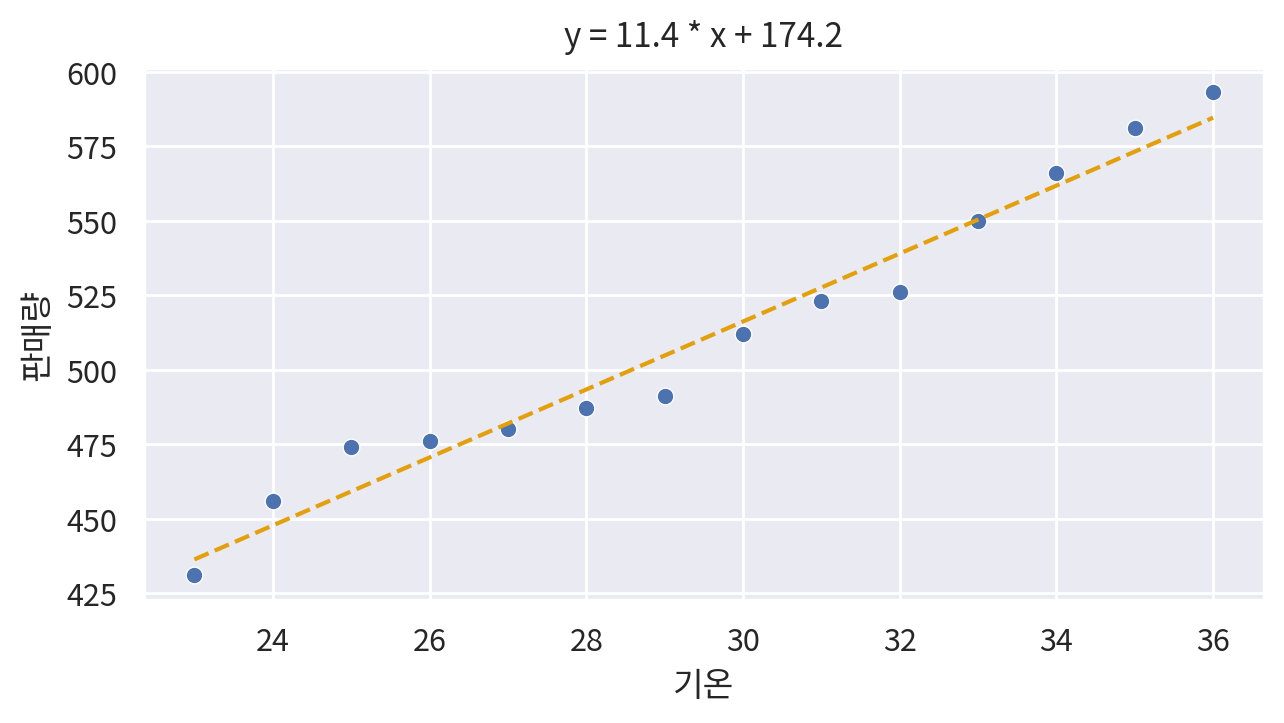

In [13]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.scatterplot(data=origin, x='기온', y='판매량')

sb.lineplot(x=x, y=y, color="#e4a00c", linestyle="--")

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)
ax.set_title(expr,fontsize=12, pad=8)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료